In [60]:
import pandas as pd

# techCompanies = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "PYPL", "TSLA"]
#Mining
miningCompanies = ["GLNCY", "BHP", "RIO", "VALE", "CSUAY", "NGLOY", "ZIJMF"]

def getData(tickers):
  df = pd.read_csv("/content/"+tickers[0]+".csv", index_col=0)

  for i in range(1,len(tickers)):
    dfNew = pd.read_csv("/content/"+tickers[i]+".csv", index_col=0)
    # print(len(dfNew))
    df = df.merge(dfNew, on="Date", suffixes=["_"+tickers[i-1],"_"+tickers[i]])

  last = tickers[len(tickers)-1]
  df = df.rename(columns={'Open': 'Open_'+last, 'High': 'High_'+last, 'Low' : 'Low_'+last, 'Close': 'Close_'+last, 'Volume': 'Volume_'+last})
  
  columns = ["Close_"+a for a in tickers]
  columns.append("Date")
  dfPrices = df[columns]
  # dfPrices
  
  return dfPrices

dfMiningPrices = getData(miningCompanies)
dfMiningPrices

,Close_GLNCY,Close_BHP,Close_RIO,Close_VALE,Close_CSUAY,Close_NGLOY,Close_ZIJMF,Date
0,11.67,60.43,68.90,16.33,12.14,17.20,1.52,"Feb 24, 2023"
1,11.97,62.83,71.49,16.92,12.29,18.17,1.60,"Feb 23, 2023"
2,11.80,64.18,72.85,16.91,12.12,18.47,1.60,"Feb 22, 2023"
3,12.01,66.27,75.38,17.04,12.13,18.91,1.57,"Feb 21, 2023"
4,12.27,66.44,74.44,17.02,11.86,19.39,1.53,"Feb 17, 2023"
...,...,...,...,...,...,...,...,...
1256,10.13,45.33,58.41,14.58,11.08,12.59,0.46,"May 18, 2018"
1257,10.68,45.83,58.98,15.03,10.50,12.82,0.46,"May 17, 2018"
1258,10.60,45.91,58.93,15.13,10.63,12.89,0.46,"May 16, 2018"
1259,10.20,45.20,57.52,14.91,10.59,12.28,0.46,"May 15, 2018"


In [61]:
dfMiningPrices.describe()

,Close_GLNCY,Close_BHP,Close_RIO,Close_VALE,Close_CSUAY,Close_NGLOY,Close_ZIJMF
count,1251.000000,1249.000000,1251.000000,1253.00000,1256.000000,1251.000000,1256.000000
mean,8.202694,51.647742,62.999832,14.30759,9.093073,15.759472,0.854618
std,2.737592,9.391790,11.986492,3.31682,1.828171,4.709209,0.462107
min,2.550000,27.590000,36.420000,6.58000,6.140000,6.150000,0.310000
25%,6.155000,44.920000,54.340000,12.09000,7.680000,11.920000,0.400000
50%,8.090000,49.100000,60.250000,13.50000,8.700000,14.180000,0.710000
75%,10.130000,59.680000,72.620000,16.59000,10.192500,19.710000,1.310000
max,14.310000,72.260000,94.650000,22.94000,13.780000,27.700000,1.890000


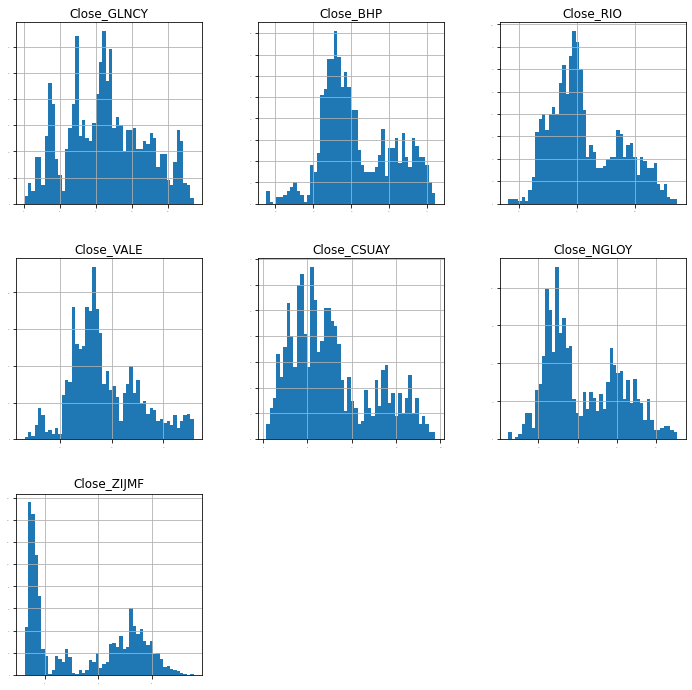

In [62]:
from matplotlib import pyplot
# Analysis from https://github.com/tatsath/fin-ml/blob/master/Chapter%205%20-%20Sup.%20Learning%20-%20Regression%20and%20Time%20Series%20models/Case%20Study%201%20-%20Stock%20Price%20Prediction/StockPricePrediction.ipynb
dfMiningPrices.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

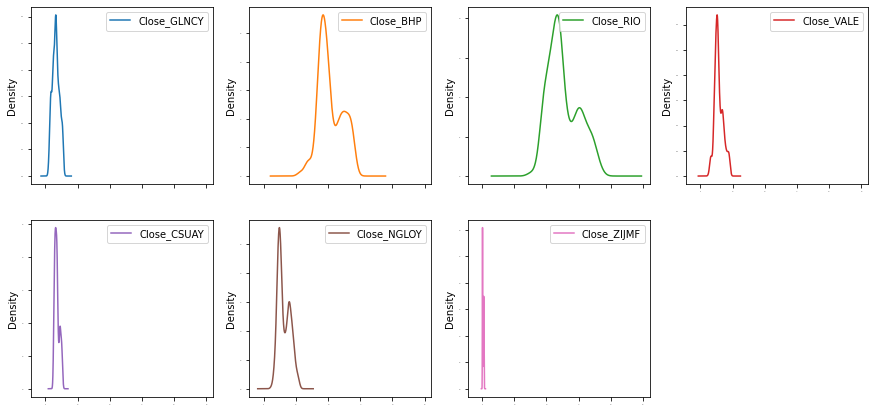

In [63]:
# Analysis from https://github.com/tatsath/fin-ml/blob/master/Chapter%205%20-%20Sup.%20Learning%20-%20Regression%20and%20Time%20Series%20models/Case%20Study%201%20-%20Stock%20Price%20Prediction/StockPricePrediction.ipynb
dfMiningPrices.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()

<AxesSubplot:title={'center':'Correlation Matrix'}>

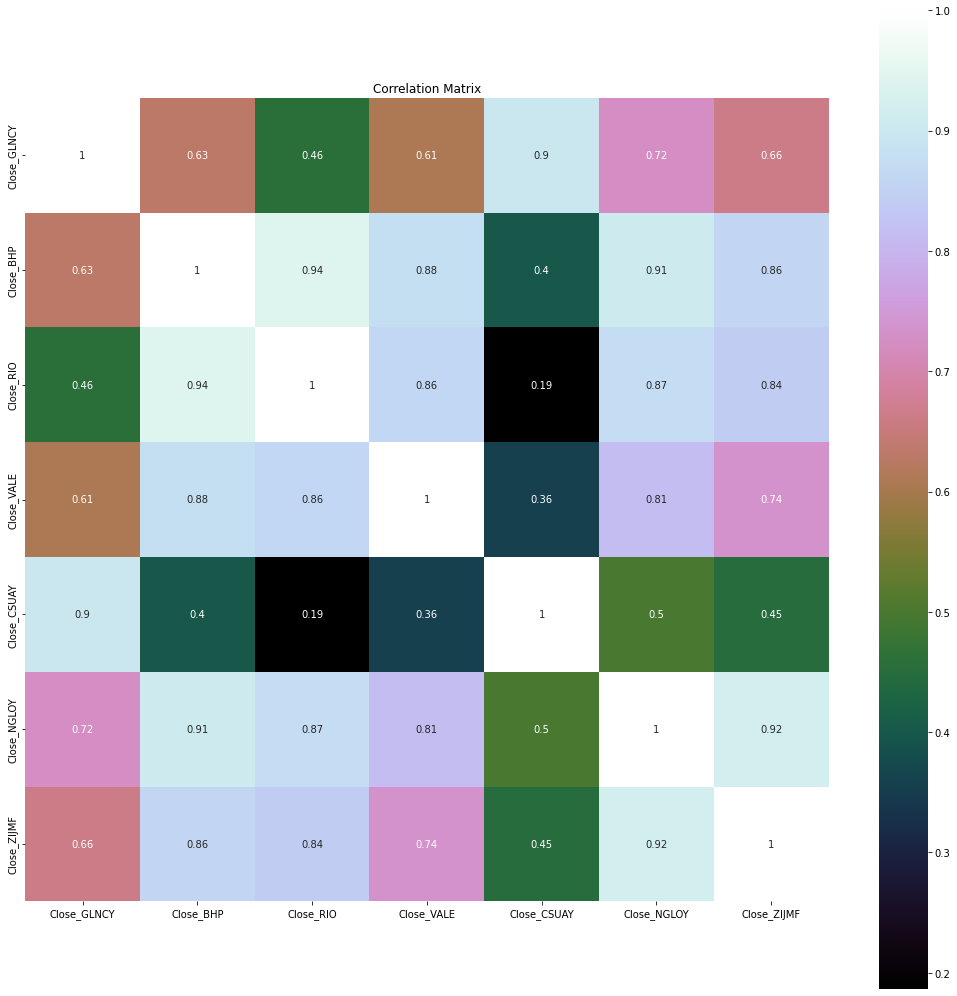

In [64]:
# Analysis from https://github.com/tatsath/fin-ml/blob/master/Chapter%205%20-%20Sup.%20Learning%20-%20Regression%20and%20Time%20Series%20models/Case%20Study%201%20-%20Stock%20Price%20Prediction/StockPricePrediction.ipynb
import seaborn as sns
corr = dfMiningPrices.corr()
pyplot.figure(figsize=(18,18))
pyplot.title('Correlation Matrix')
sns.heatmap(corr, vmax=1, square=True, annot=True,cmap='cubehelix')

<Figure size 1080x1080 with 0 Axes>

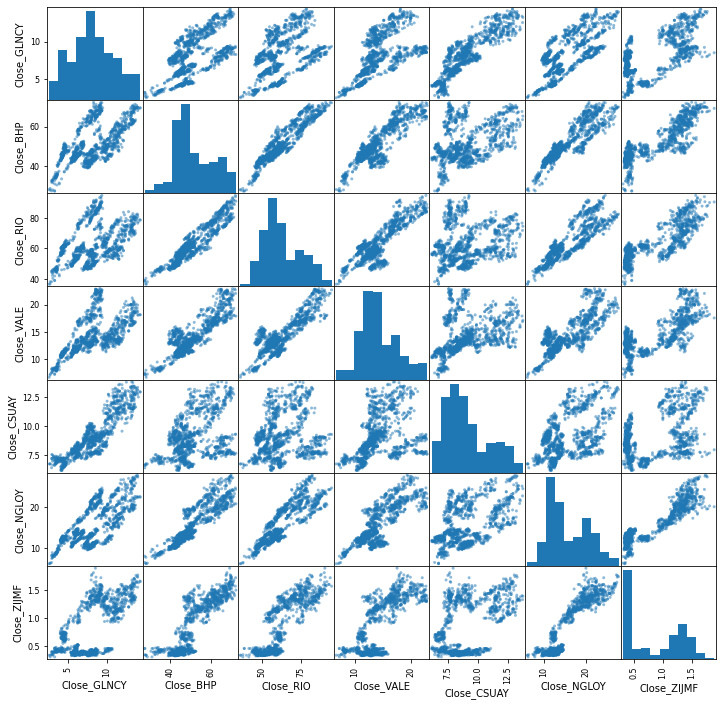

In [65]:
# Analysis from https://github.com/tatsath/fin-ml/blob/master/Chapter%205%20-%20Sup.%20Learning%20-%20Regression%20and%20Time%20Series%20models/Case%20Study%201%20-%20Stock%20Price%20Prediction/StockPricePrediction.ipynb
from pandas.plotting import scatter_matrix
pyplot.figure(figsize=(15,15))
scatter_matrix(dfMiningPrices,figsize=(12,12))
pyplot.show()

In [66]:
retailCompanies = ["WMT", "COST", "HD", "JD", "KR",  "WBA", "BABA", "TGT", "LOW"]
dfRetailPrices = getData(retailCompanies)
dfRetailPrices

,Close_WMT,Close_COST,Close_HD,Close_JD,Close_KR,Close_WBA,Close_BABA,Close_TGT,Close_LOW,Date
0,142.47,488.61,296.66,44.80,43.75,35.80,89.00,166.96,201.54,"Feb 24, 2023"
1,142.09,493.14,299.31,46.65,43.91,36.21,94.16,165.50,202.21,"Feb 23, 2023"
2,144.24,497.39,296.30,46.53,44.62,36.08,94.78,165.72,202.63,"Feb 22, 2023"
3,147.33,501.74,295.50,47.17,44.62,36.16,95.10,166.22,201.85,"Feb 21, 2023"
4,146.44,507.48,317.95,53.02,44.00,36.76,100.01,173.22,212.75,"Feb 17, 2023"
...,...,...,...,...,...,...,...,...,...,...
1358,86.13,198.71,186.38,36.43,24.94,65.74,198.11,75.23,85.51,"May 16, 2018"
1359,84.52,195.48,187.98,36.12,24.75,64.61,196.61,73.08,85.69,"May 15, 2018"
1360,84.52,195.48,187.98,36.12,24.75,64.61,196.61,NaN,85.69,"May 15, 2018"
1361,84.39,195.88,191.08,37.17,24.73,65.10,198.64,72.90,86.58,"May 14, 2018"


In [67]:
dfRetailPrices.describe()

,Close_WMT,Close_COST,Close_HD,Close_JD,Close_KR,Close_WBA,Close_BABA,Close_TGT,Close_LOW
count,1342.000000,1341.000000,1344.000000,1361.000000,1335.000000,1329.000000,1363.000000,1333.000000,1344.000000
mean,125.028122,362.726152,263.927560,53.719809,35.637775,50.780963,175.031805,147.736872,154.895647
std,19.733773,111.568983,59.817812,21.710604,9.094961,11.534209,57.009241,58.478583,49.126386
min,82.400000,189.990000,152.150000,19.270000,20.820000,30.520000,63.150000,61.130000,65.020000
25%,111.157500,274.570000,207.510000,32.160000,28.430000,41.440000,128.020000,87.970000,106.927500
50%,130.035000,342.150000,269.765000,55.370000,33.280000,49.220000,176.660000,147.610000,158.370000
75%,141.917500,467.990000,313.232500,73.140000,43.890000,55.060000,213.520000,191.410000,197.212500
max,159.870000,608.050000,416.180000,106.880000,61.670000,85.690000,317.140000,266.390000,261.380000


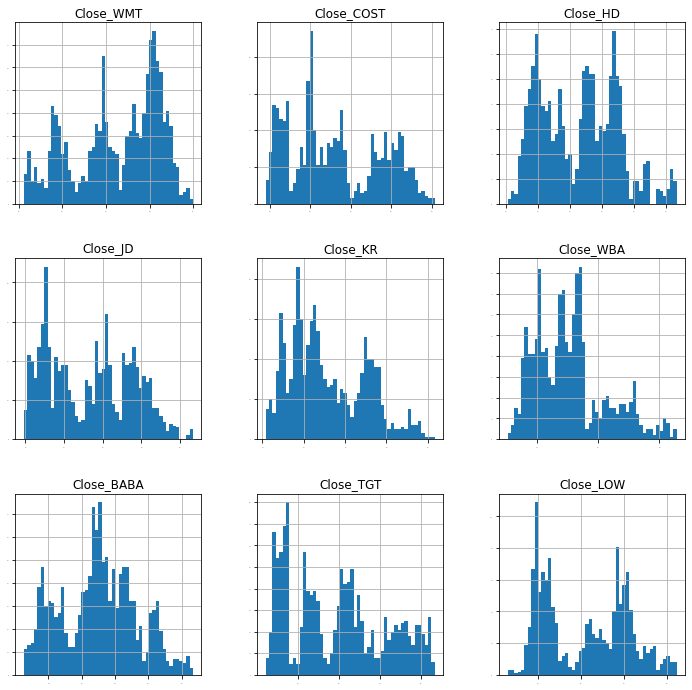

In [68]:
# Analysis from https://github.com/tatsath/fin-ml/blob/master/Chapter%205%20-%20Sup.%20Learning%20-%20Regression%20and%20Time%20Series%20models/Case%20Study%201%20-%20Stock%20Price%20Prediction/StockPricePrediction.ipynb
dfRetailPrices.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

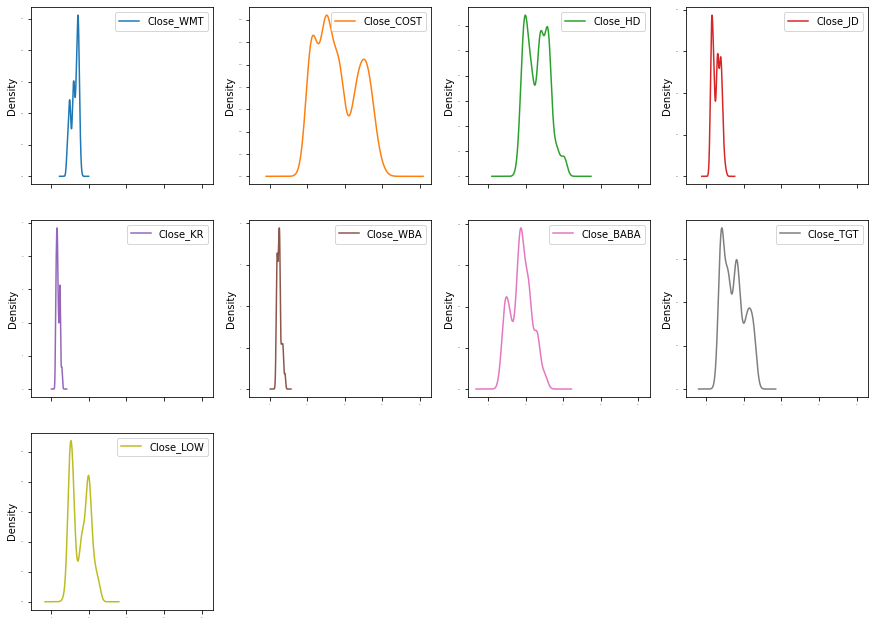

In [69]:
dfRetailPrices.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()

<AxesSubplot:title={'center':'Correlation Matrix'}>

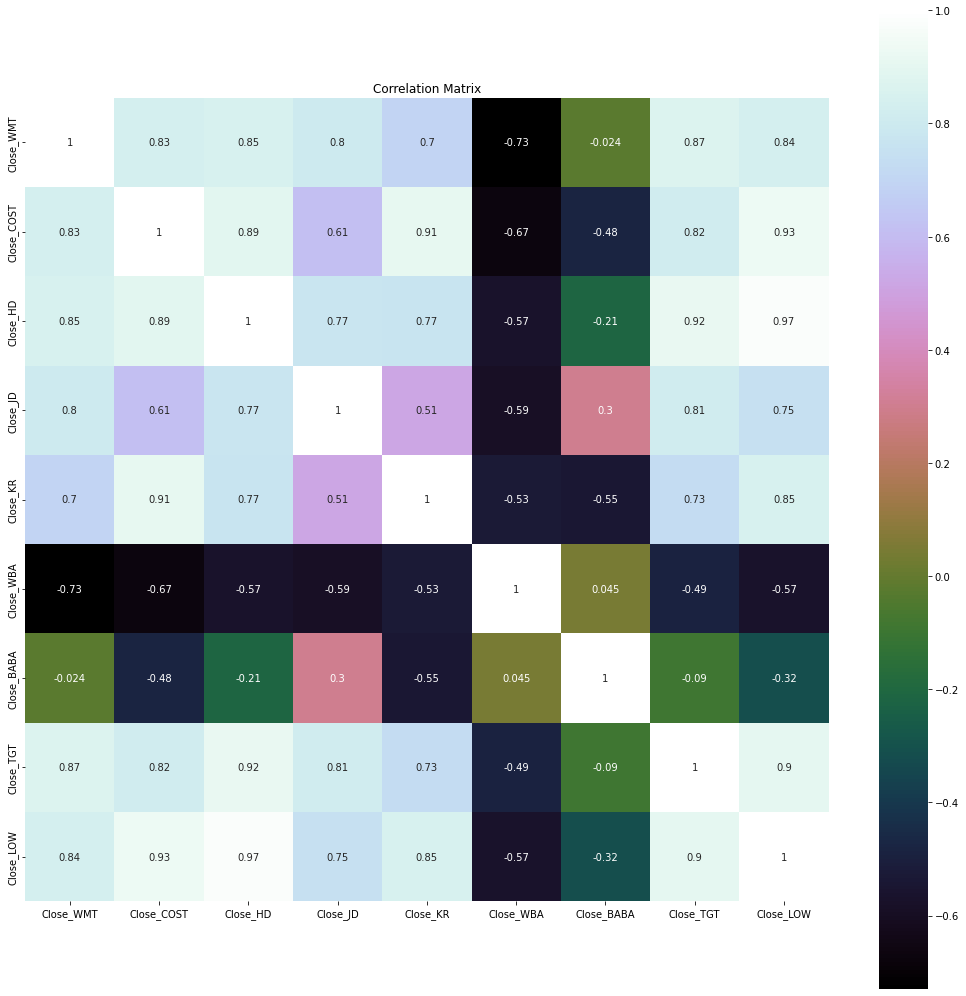

In [70]:
corr = dfRetailPrices.corr()
pyplot.figure(figsize=(18,18))
pyplot.title('Correlation Matrix')
sns.heatmap(corr, vmax=1, square=True, annot=True,cmap='cubehelix')

**Construction**

In [49]:
# constructionCompanies = ["LEN", "LGIH", "DFH", "PHM", "CAT", "CCS", "MTH", "TOL", "DHI", "KBH"]
constructionCompanies = ["LEN", "LGIH", "PHM", "CAT", "CCS", "MTH", "TOL", "DHI", "KBH"]
# remove DFH as it only has 528 stock data

dfConstructionPrices = getData(constructionCompanies)
dfConstructionPrices

,Close_LEN,Close_LGIH,Close_PHM,Close_CAT,Close_CCS,Close_MTH,Close_TOL,Close_DHI,Close_KBH,Date
0,95.84,105.18,53.58,236.17,59.51,107.60,58.33,91.16,35.20,"Feb 24, 2023"
1,97.15,107.07,54.00,237.95,59.95,108.69,58.88,92.26,35.52,"Feb 23, 2023"
2,96.36,104.39,53.12,237.89,58.69,107.35,57.46,91.14,34.77,"Feb 22, 2023"
3,95.77,104.66,52.76,240.71,58.16,106.99,55.77,90.26,34.51,"Feb 21, 2023"
4,99.09,114.29,54.30,247.79,59.98,109.03,57.20,94.38,35.66,"Feb 17, 2023"
...,...,...,...,...,...,...,...,...,...,...
1323,52.03,59.77,29.91,155.71,30.85,44.80,43.16,41.84,26.54,"May 18, 2018"
1324,51.30,59.28,29.58,153.69,30.30,43.70,42.40,41.39,25.82,"May 17, 2018"
1325,50.97,60.00,29.41,153.80,30.00,42.55,41.70,40.97,25.34,"May 16, 2018"
1326,51.21,58.19,29.30,152.59,29.35,42.00,40.89,40.58,25.20,"May 15, 2018"


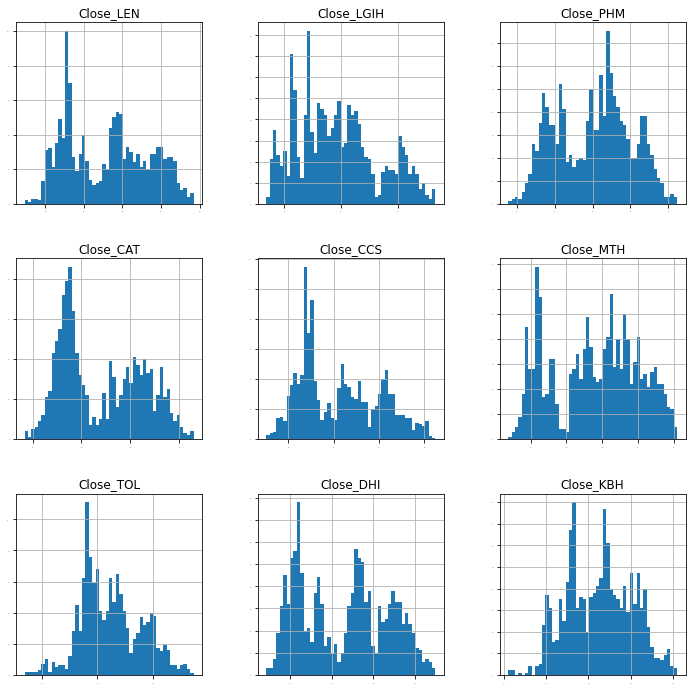

In [50]:
dfConstructionPrices.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

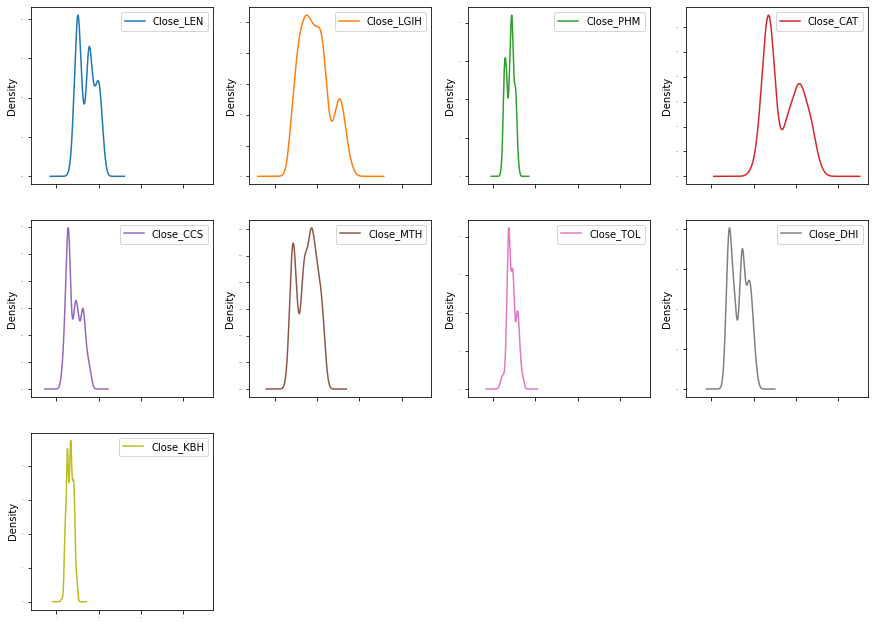

In [52]:
dfConstructionPrices.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()

<AxesSubplot:title={'center':'Correlation Matrix'}>

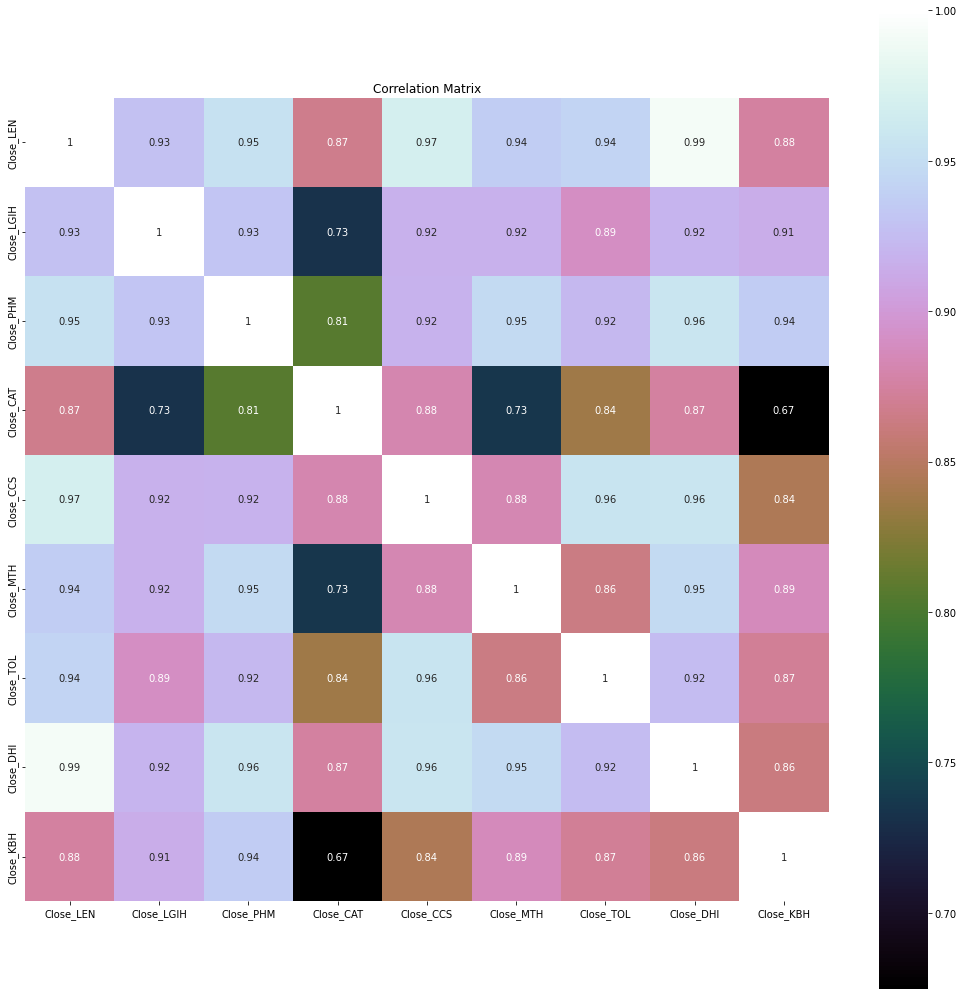

In [54]:
corr = dfConstructionPrices.corr()
pyplot.figure(figsize=(18,18))
pyplot.title('Correlation Matrix')
sns.heatmap(corr, vmax=1, square=True, annot=True,cmap='cubehelix')

In [56]:
carCompanies = ["TM", "BYDDF", "VWAGY", "MBGYY", "STLA", "GM", "RACE", "F", "HMC"]
dfAutomobilePrices = getData(carCompanies)
dfAutomobilePrices

,Close_TM,Close_BYDDF,Close_VWAGY,Close_MBGYY,Close_STLA,Close_GM,Close_RACE,Close_F,Close_HMC,Date
0,136.05,27.78,17.22,19.00,17.57,39.18,259.11,11.88,25.75,"Feb 24, 2023"
1,138.95,28.24,17.89,19.80,18.02,39.25,262.15,12.07,25.89,"Feb 23, 2023"
2,138.65,28.53,17.57,19.58,17.27,40.89,260.60,12.21,25.82,"Feb 22, 2023"
3,139.18,28.80,17.48,19.66,16.66,41.13,262.80,12.20,25.90,"Feb 21, 2023"
4,142.85,29.30,17.86,19.98,17.29,43.17,266.88,12.89,25.54,"Feb 17, 2023"
...,...,...,...,...,...,...,...,...,...,...
1265,136.04,6.74,20.09,19.79,21.86,37.79,132.53,11.33,32.98,"May 18, 2018"
1266,136.67,6.75,20.09,19.95,22.18,38.30,133.73,11.46,33.10,"May 17, 2018"
1267,137.35,6.93,20.02,19.78,22.28,38.03,133.84,11.40,33.15,"May 16, 2018"
1268,136.22,6.90,20.17,19.78,22.38,36.94,133.89,11.22,32.85,"May 15, 2018"


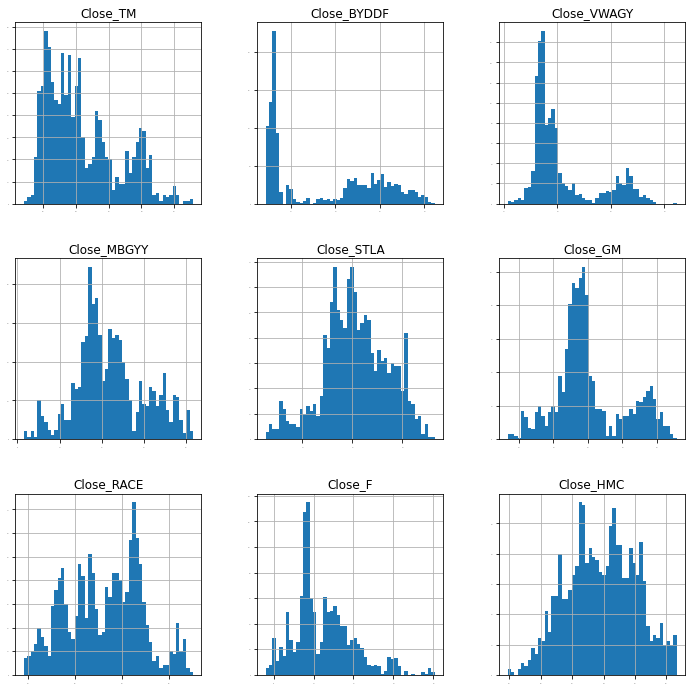

In [57]:
dfAutomobilePrices.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

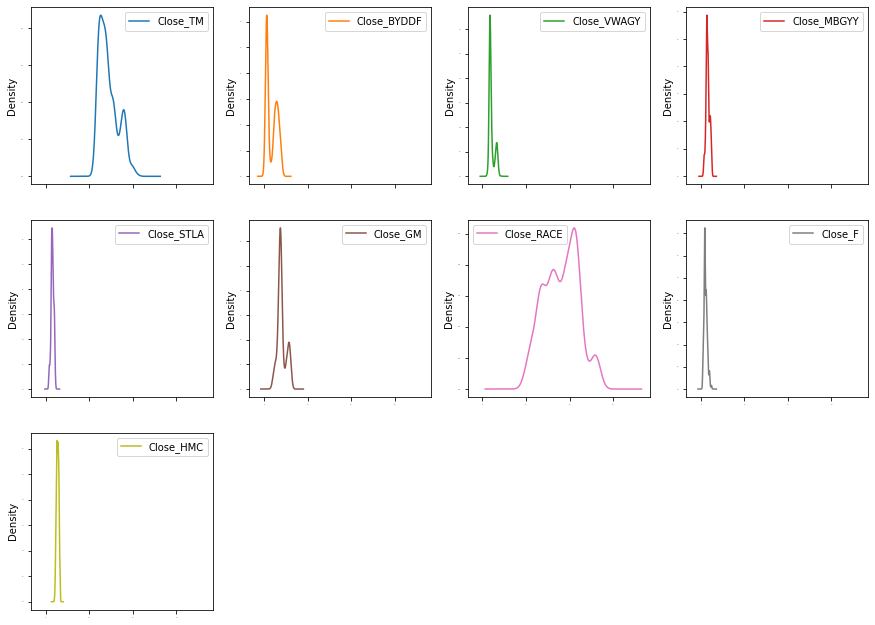

In [58]:
dfAutomobilePrices.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()

<AxesSubplot:title={'center':'Correlation Matrix'}>

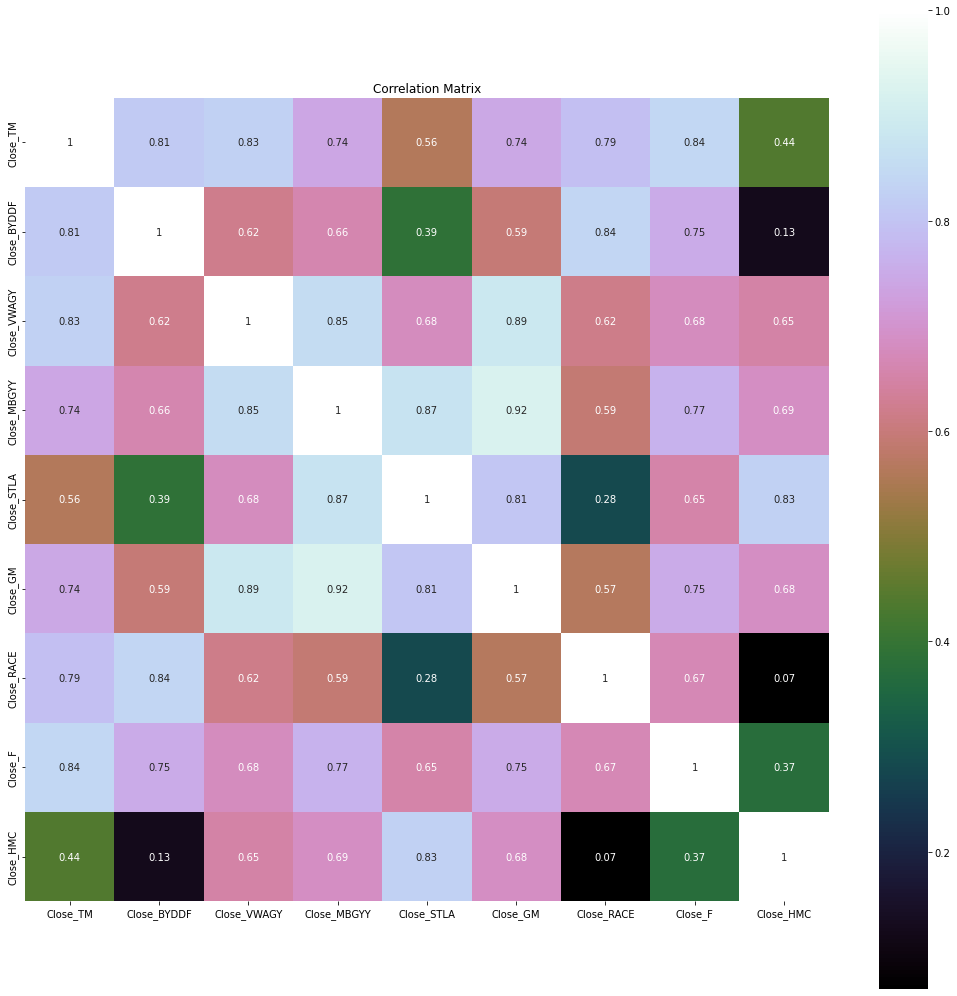

In [59]:
corr = dfAutomobilePrices.corr()
pyplot.figure(figsize=(18,18))
pyplot.title('Correlation Matrix')
sns.heatmap(corr, vmax=1, square=True, annot=True,cmap='cubehelix')